In [2]:
import pandas as pd
import numpy as np
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, MaxPooling1D, Dropout, Input
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the dataset
csv_file = r"C:\Users\rhuch\OneDrive\Documents (1)\College\ISL_Project_Static\csv_dataset\keypoints.csv"  # Replace with the path to your CSV file
data = pd.read_csv(csv_file)

# Split features and labels
X = data.iloc[:, :-1].values  # All columns except the last one are features (42 points per gesture)
y = data.iloc[:, -1].values   # The last column contains the labels

# Convert all values in y to strings
y = y.astype(str)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


unique_labels, counts = np.unique(y, return_counts=True)

# Print each label and its count
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

print("Shape before everything: ", X.shape)
# Normalize the feature values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

joblib.dump(scaler, 'scaler.pkl')  # Save the scaler to a file
print("Scaler saved as: scaler.pkl")

# Reshape the data for CNN and LSTM
X_reshaped = X_normalized.reshape(X_normalized.shape[0], X_normalized.shape[1], 1)

print("Training data shape:", X_reshaped.shape)
print("Shape of sample preprocessed training data:", X_reshaped[0].shape)
print("Sample preprocessed training data:", X_reshaped[0])

print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

abc = X_reshaped[0]

C:\Users\rhuch\AppData\Local\Temp\ipykernel_24016\2072060881.py:3: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Label: 0, Count: 541
Label: 1, Count: 1915
Label: 2, Count: 1864
Label: 3, Count: 1911
Label: 4, Count: 1752
Label: 5, Count: 1987
Label: 6, Count: 1693
Label: 7, Count: 1779
Label: 8, Count: 1896
Label: 9, Count: 1917
Label: A, Count: 2061
Label: B, Count: 1954
Label: C, Count: 1937
Label: D, Count: 1946
Label: E, Count: 1828
Label: F, Count: 1947
Label: G, Count: 1735
Label: H, Count: 1821
Label: I, Count: 1752
Label: J, Count: 1683
Label: K, Count: 1785
Label: L, Count: 1807
Label: M, Count: 1941
Label: N, Count: 1918
Label: O, Count: 1934
Label: P, Count: 1975
Label: Q, Count: 1810
Label: R, Count: 2087
Label: S, Count: 2031
Label: T, Count: 1997
Label: U, Count: 1929
Label: V, Count: 1879
Label: W, Count: 1726
Label: X, Count: 1959
Label: Y, Count: 1912
Label: Z, Count: 1732
Shape before everything:  (66341, 84)
Scaler saved as: scaler.pkl
Training data shape: (66341, 84, 1)
Shape of sample preprocessed training data: (84, 1)
Sample preprocessed training data: [[ 1.15004894]
 [ 0.

In [4]:
# Label mapping
label_map = {i: class_name for i, class_name in enumerate(np.unique(y))}

# Build the model
model = Sequential()

# Define input layer
model.add(Input(shape=(X_reshaped.shape[1], 1)))

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM layers
model.add(LSTM(128, return_sequences=False))  # Was True before
model.add(Dropout(0.5))

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_map), activation='softmax'))  # Use len(label_map) for the output layer size

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
eval_results = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {eval_results[1] * 100:.2f}%")

# Save the model
model.save("large_dataset_model.keras")

# Save the label map
with open('label_map_numbers.json', 'w') as f:
    json.dump(label_map, f)
print("Label map saved as: label_map.json")

Epoch 1/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 94s 53ms/step - accuracy: 0.5026 - loss: 1.7564 - val_accuracy: 0.8937 - val_loss: 0.3768
Epoch 2/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 85s 51ms/step - accuracy: 0.8770 - loss: 0.4356 - val_accuracy: 0.9280 - val_loss: 0.2562
Epoch 3/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 106s 64ms/step - accuracy: 0.9138 - loss: 0.3081 - val_accuracy: 0.9366 - val_loss: 0.2299
Epoch 4/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 96s 58ms/step - accuracy: 0.9268 - loss: 0.2588 - val_accuracy: 0.9453 - val_loss: 0.1971
Epoch 5/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 87s 52ms/step - accuracy: 0.9350 - loss: 0.2245 - val_accuracy: 0.9519 - val_loss: 0.1616
Epoch 6/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 167s 67ms/step - accuracy: 0.9444 - loss: 0.1947 - val_accuracy: 0.9554 - val_loss: 0.1525
Epoch 7/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 120s 72ms/step - accuracy: 0.9507 - loss: 0.1742 - val_accuracy: 0.9518 - val_loss: 0.1630
Epoch 8/50
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 116s 70ms/step - accuracy: 0.95


Training history plot saved as 'training_history.png'


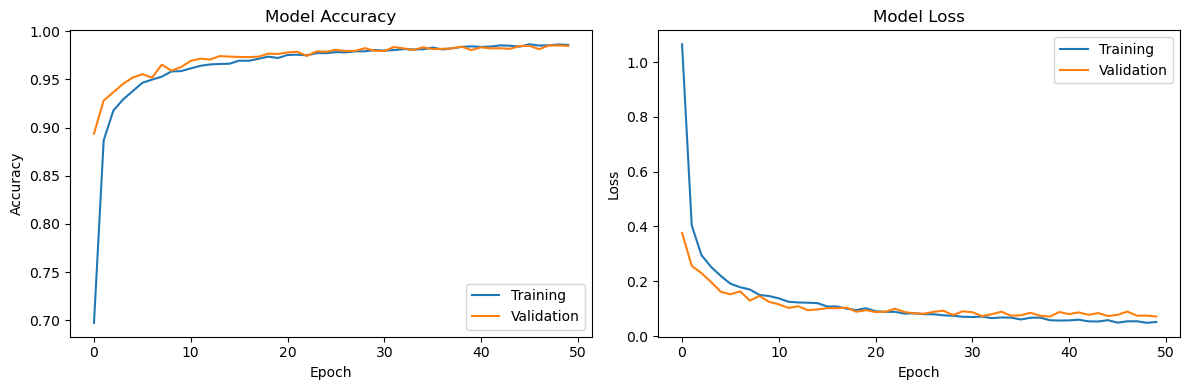

In [10]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
print("\nTraining history plot saved as 'training_history.png'")